## Q 1) KNN classification and regression from scratch

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.datasets import make_classification as generate_dataset, make_regression as gen_reg_dataset
import time

In [47]:
def accuracy_score(y1,y2):
    #np.reshape(y1,y2.shape)
    count=0.0
    for i in range(len(y1)):
        if y1[i]==y2[i]:
            count+=1
    return count*100.0/len(y1)

def rmse(y1,y2):
    y1=np.array(y1)
    y2=np.array(y2)
    return ((sum((y1-y2)**2))/len(y1))**0.5

In [30]:
#generating random dataset
N=1000   #np. of datapoints
f=20     #no. of features
X,Y=generate_dataset(n_samples=N, n_features=f)
Y=np.reshape(Y, (N,1))

In [31]:
#test-train split
def test_train(X,Y,splitx=0.7):
    split=int(splitx*N)
    train_X=X[:split]
    train_Y=Y[:split]
    test_X=X[split:]
    ground_truth=Y[split:]
    #print(train_X.shape)
    #print(train_Y.shape)
    #print(test_X.shape)
    #print(ground_truth.shape)
    return [train_X, train_Y, test_X, ground_truth]

In [32]:
[train_X, train_Y, test_X, ground_truth]=test_train(X,Y)

In [33]:
#distance functions
#O(d) complexity
def Euclidean(X,Y):#, ’Manhattan’ or ’Cosine’
    X=np.array(X)
    Y=np.array(Y)
    return (sum((X-Y)**2))**0.5      

def Manhattan(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    return sum(np.abs(X-Y))

def Cosine(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    return 1-(sum(X*Y)/(np.linalg.norm(X)*np.linalg.norm(Y)))

In [34]:
#KNN Algorithm
def KNN_predict(train_X, train_Y, test_X, K=3, distance_metric=Euclidean, typ='classification'):
    predict=[]
    for x1 in test_X:
        distances=[]
        for index, x2 in enumerate(train_X):
            distances.append((index, distance_metric(x1,x2)))
        sorted_d=sorted(distances, key=lambda x: x[1])
        knn_classes=[]
        for i in sorted_d[:K]:
            knn_classes.append(train_Y[i[0]])
        if typ=='classification':
            predict.append(stats.mode(knn_classes).mode[0])
        else:
            predict.append(np.mean(knn_classes))
    return predict

## Accuracy scores for KNN classification for diff. Dist. Metrices

In [35]:
for i in [Euclidean, Manhattan, Cosine]:
    test_pred=KNN_predict(train_X, train_Y, test_X, 8, distance_metric=i, typ='classification')
    print("Accuracy Score ",i, "=", accuracy_score(ground_truth, test_pred))

Accuracy Score  <function Euclidean at 0x7f90fc193d08> = 86.0
Accuracy Score  <function Manhattan at 0x7f90fc193f28> = 88.0
Accuracy Score  <function Cosine at 0x7f90fe2d0158> = 85.66666666666667


## KNN Regression

In [38]:
X,Y= gen_reg_dataset(n_samples=1000, n_features=20)
[train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
for i in [Euclidean, Manhattan, Cosine]:
    test_pred=KNN_predict(train_X, train_Y, test_X, 10, distance_metric=i, typ='regression')
    print("RMSE Score ",i, "=", rmse(ground_truth,test_pred))
print("\n\nTrain Errors:\n")
for i in [Euclidean, Manhattan, Cosine]:
    train_pred=KNN_predict(train_X, train_Y, train_X, 10, distance_metric=i, typ='regression')
    print("RMSE Score ",i, "=", rmse(train_Y,train_pred))

RMSE Score  <function Euclidean at 0x7f90fc193d08> = 83.32154060496477
RMSE Score  <function Manhattan at 0x7f90fc193f28> = 93.11214090612081
RMSE Score  <function Cosine at 0x7f90fe2d0158> = 75.86339514008378


Train Errors:

RMSE Score  <function Euclidean at 0x7f90fc193d08> = 69.6112394381999
RMSE Score  <function Manhattan at 0x7f90fc193f28> = 74.72986953317599
RMSE Score  <function Cosine at 0x7f90fe2d0158> = 66.06933734604952


The train and test RMSE values are similar, hence denoting the reliability of the learned model

## 1b)

Finding the variation in runtime of the KNN classification algorithm with changing features and number of data points (Almost same for Regression case)

In [19]:
# for different dimension and constant number of data points
f_set=[]
f_time=[]
for f in range(5,100,3):
    X,Y=generate_dataset(n_samples=1000, n_features=f, n_informative=f-2)
    [train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
    start=time.time()
    test_pred=KNN_predict(train_X, train_Y, test_X, K=8, distance_metric=i, typ='classification')
    end=time.time()
    f_set.append(f)
    f_time.append(end-start)

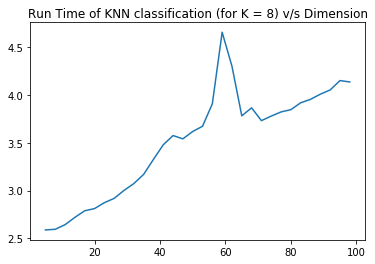

In [20]:
plt.title("Run Time of KNN classification (for K = 8) v/s Dimension")
plt.plot(f_set,f_time)

In [53]:
# for constant dimension and diff number of data points
N_set=[]
N_time=[]
for n in range(1000,4000,100):
    X,Y=generate_dataset(n_samples=n)
    [train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
    start=time.time()
    test_pred=KNN_predict(train_X, train_Y, test_X, K=8, distance_metric=i, typ='classification')
    end=time.time()
    N_set.append(n)
    N_time.append(end-start)

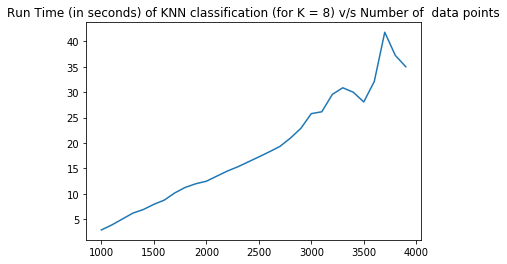

In [54]:
plt.title("Run Time (in seconds) of KNN classification (for K = 8) v/s Number of  data points")
plt.plot(N_set, N_time)

## Comparison with theoretical runtime

Theoretically, the run time has a linearly increasing relationship with the dimension of data points. This is visible in the first graph. The relationship with no. of data points is also the same as is visible in the 2nd graph. The small differences can be attributed to the hardware. O(kn+dn) for predicting each data point

## Comparing the model for regression with the inbuilt regression model of sklearn

In [42]:
from sklearn.neighbors import KNeighborsRegressor as KNNr


In [48]:
X,Y= gen_reg_dataset(n_samples=1000, n_features=20)
[train_X, train_Y, test_X, ground_truth]=test_train(X,Y)
knnr=KNNr(n_neighbors=5)
knnr.fit(train_X, train_Y)
y_=knnr.predict(test_X)
rmse(y_, ground_truth)

108.48324228021667

The rmse for regression is near about 100 for both sklearn's and my own model